In [155]:
import pandas as pd

import missingno as msno
import seaborn as sns
sns.set() #для детальной визуализации матриц

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import GridSearchCV

from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score

## Информация о датасете

Датасет содержит данные о покупателях и включает следующие характеристики:

1. **CustomerID**:  
   Уникальный идентификационный номер покупателя, который позволяет однозначно идентифицировать каждого клиента в базе данных.

2. **Genre**:  
   Пол покупателя, представлен в виде категориальной переменной. Значения могут быть, например, 'Мужской' и 'Женский'.

3. **Age**:  
   Возраст покупателя, представленный в числовом формате. Этот признак позволяет анализировать покупательское поведение в зависимости от возраста.

4. **Annual Income (k$)**:  
   Годовой доход покупателя, измеряемый в тысячах долларов. Этот параметр важен для понимания финансовых возможностей клиентов.

5. **Spending Score (1-100)**:  
   Оценка расходов покупателя, варьирующаяся от 0 до 100. Этот показатель отражает, насколько активно клиент тратит свои деньги, и может использоваться для сегментации клиентов.


# Общая информация

In [156]:
df = pd.read_csv('Mall_Customers.csv', sep=',')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [157]:
df[df.notna()]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Genre

### Label Encoder

In [158]:
labelEncoder = LabelEncoder()
df['Genre'] = labelEncoder.fit_transform(df['Genre'])
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


### Анализ данных

In [159]:
def plot_scatter_plots_with_spending_score(df, spending_score_column='Spending Score (1-100)'):
    plt.figure(figsize=(15, 10))

    # Диаграмма рассеивания Age vs Annual Income (k$) с учетом Spending Score (1-100)
    plt.subplot(2, 2, 1)
    plt.scatter(df['Age'], df['Annual Income (k$)'], c=df[spending_score_column], cmap='coolwarm', edgecolor='black')
    plt.title('Age vs Annual Income (k$)', fontsize=14)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Annual Income (k$)', fontsize=12)
    plt.colorbar(label=spending_score_column)

    # Диаграмма рассеивания Age vs Spending Score (1-100)
    plt.subplot(2, 2, 2)
    plt.scatter(df['Age'], df[spending_score_column], c=df[spending_score_column], cmap='coolwarm', edgecolor='black')
    plt.title('Age vs Spending Score (1-100)', fontsize=14)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel(spending_score_column, fontsize=12)
    plt.colorbar(label=spending_score_column)

    # Диаграмма рассеивания Annual Income (k$) vs Spending Score (1-100)
    plt.subplot(2, 2, 3)
    plt.scatter(df['Annual Income (k$)'], df[spending_score_column], c=df[spending_score_column], cmap='coolwarm', edgecolor='black')
    plt.title('Annual Income (k$) vs Spending Score (1-100)', fontsize=14)
    plt.xlabel('Annual Income (k$)', fontsize=12)
    plt.ylabel(spending_score_column, fontsize=12)
    plt.colorbar(label=spending_score_column)

    plt.tight_layout()
    plt.show()



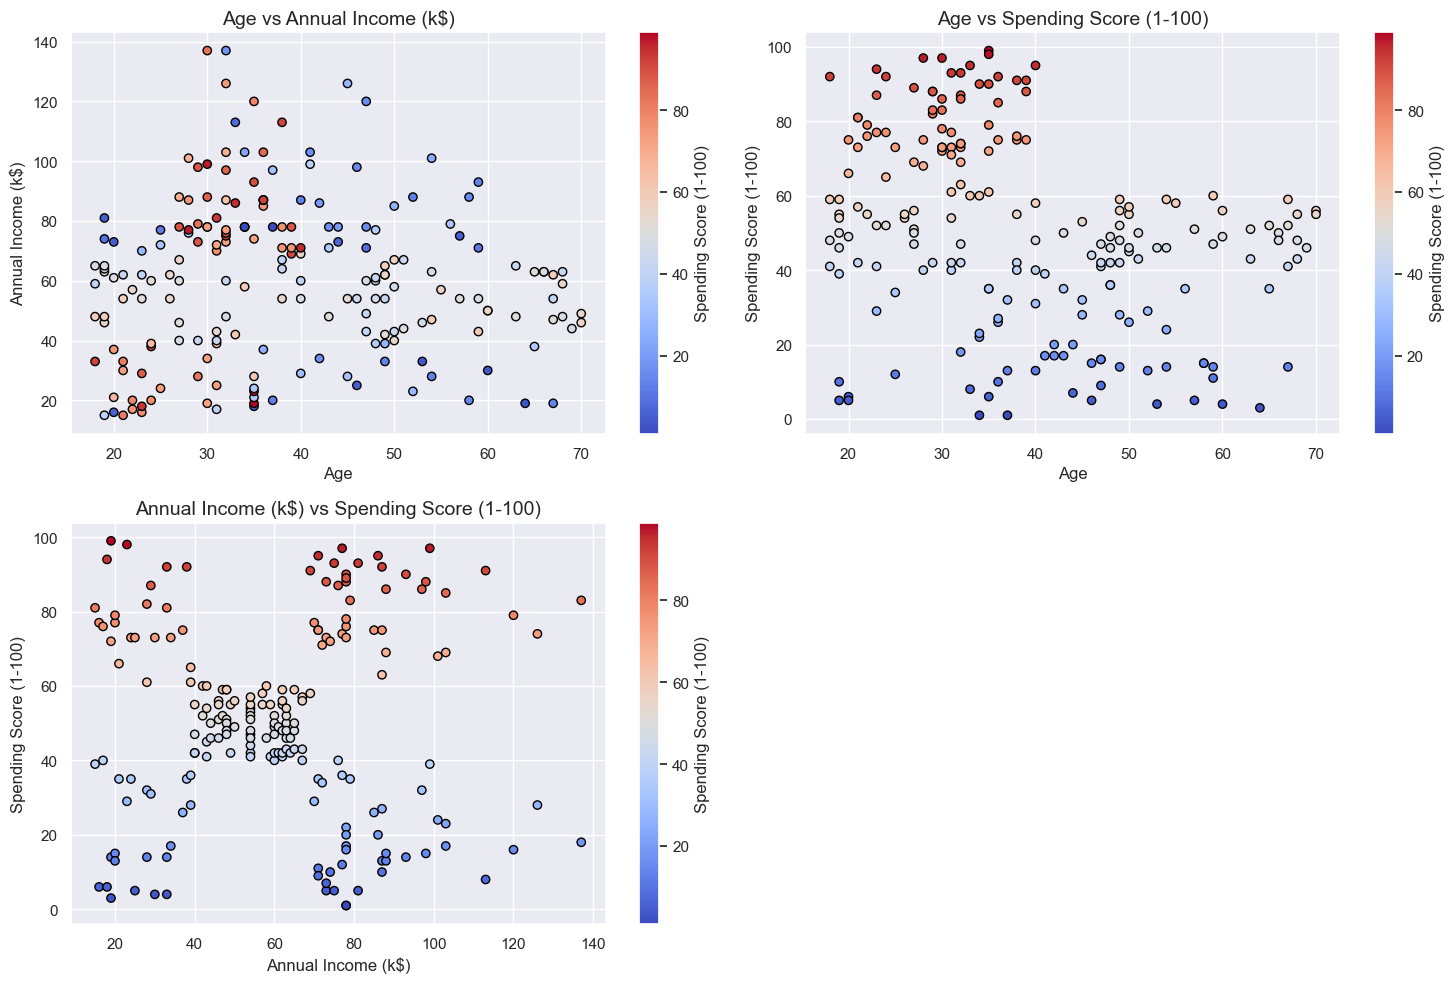

In [160]:
plot_scatter_plots_with_spending_score(df)

In [161]:
def plot_feature_distributions(df):
    features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    
    colors = ['#FFB6C1', '#ADD8E6', '#98FB98'] 
    
    plt.figure(figsize=(9, 5))  
    
    for i, feature in enumerate(features):
        plt.subplot(2, 2, i + 1)  
        plt.hist(df[feature], bins=20, color=colors[i], edgecolor='black', alpha=0.7)
        plt.title(f'Распределение {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Частота', fontsize=12)
    
    plt.tight_layout()
    plt.show()


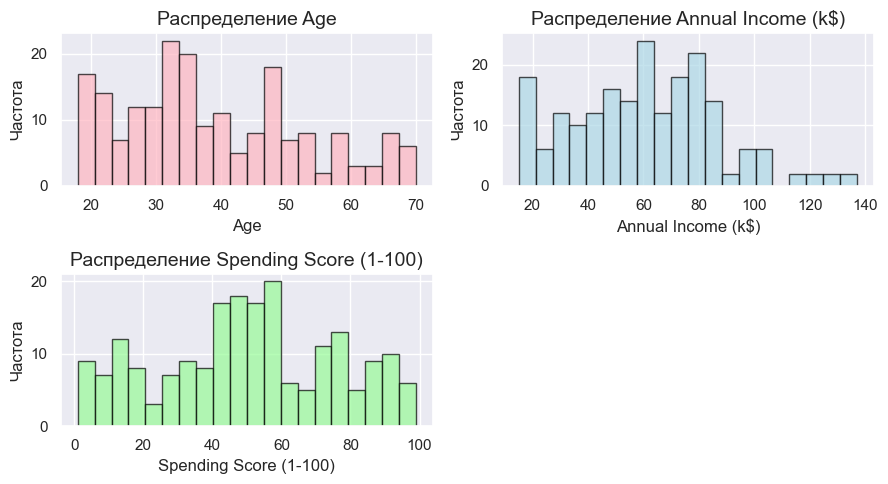

In [162]:
plot_feature_distributions(df)

In [163]:
scaler = StandardScaler()

columns_to_scale = ['Age', 'Annual Income (k$)']
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

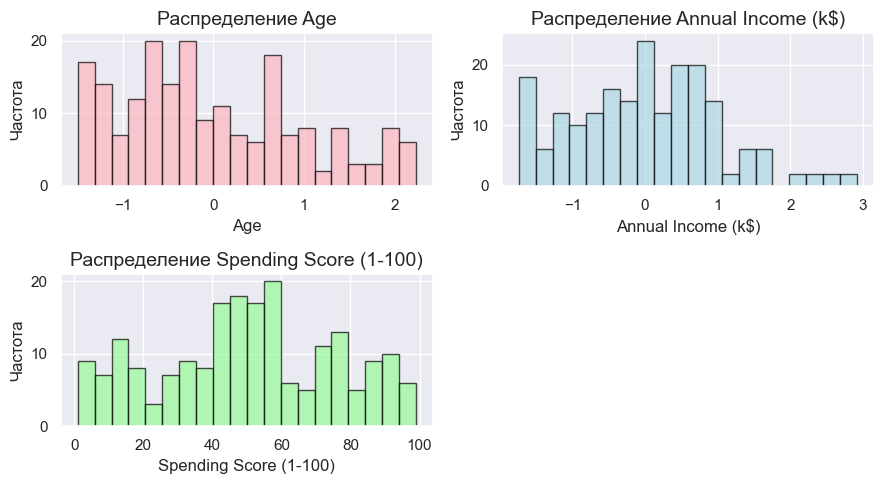

In [164]:
plot_feature_distributions(df_scaled)

# K-Means кластеризация

In [165]:
X_scaled = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])    

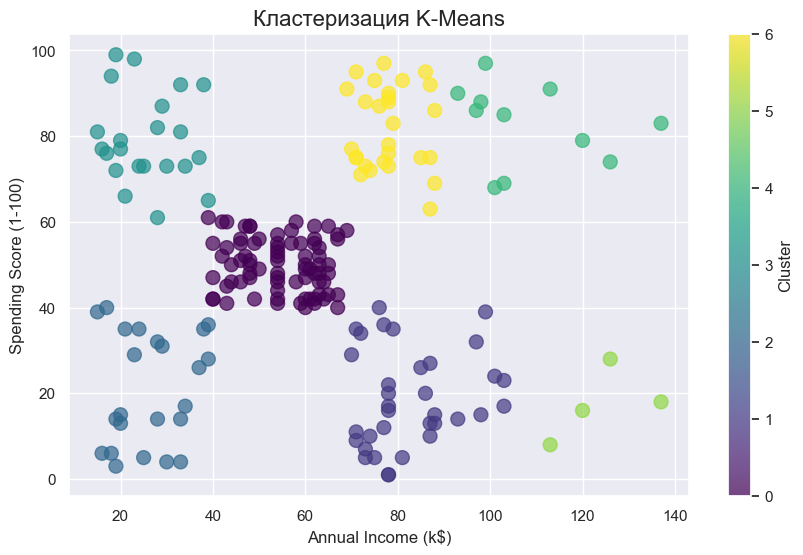

In [166]:
plt.figure(figsize=(10, 6))  
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=clusters_kmeans, cmap='viridis', s=100, alpha=0.7)  
plt.title('Кластеризация K-Means', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)

plt.grid(True)
plt.colorbar(label='Cluster')

plt.show()


In [167]:
n_clusters_options = [3, 4, 5, 6, 7]
init_options = ['k-means++', 'random']
best_score = -1
best_params = {}

for n_clusters in n_clusters_options:
    for init_method in init_options:
        kmeans = KMeans(n_clusters=n_clusters, init=init_method, random_state=42)
        clusters_kmeans = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, clusters_kmeans)
        
        if score > best_score:
            best_score = score
            best_params = {'n_clusters': n_clusters, 'init': init_method}

print("Лучшие параметры:", best_params)
print("Лучший Silhouette Score:", best_score)


Лучшие параметры: {'n_clusters': 5, 'init': 'k-means++'}
Лучший Silhouette Score: 0.5546571631111091


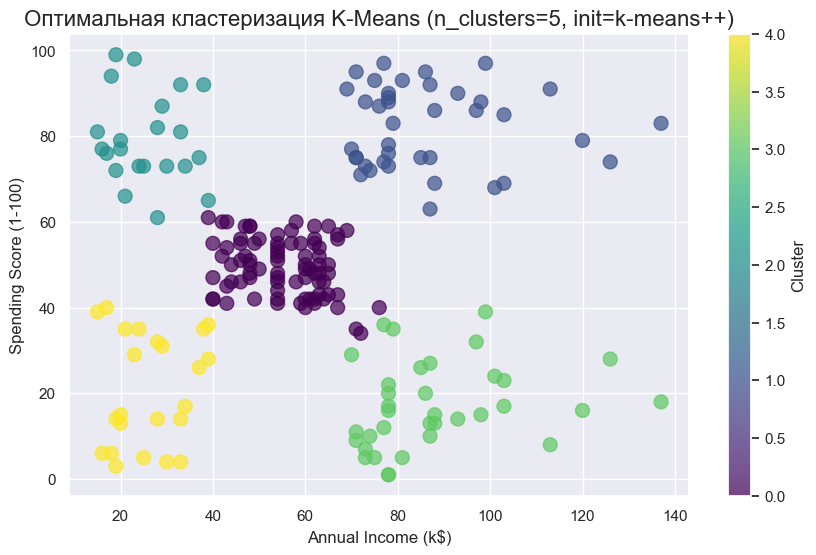

In [168]:
best_kmeans = KMeans(n_clusters=best_params['n_clusters'], init=best_params['init'], random_state=42)
clusters_best_kmeans = best_kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
            c=clusters_best_kmeans, cmap='viridis', s=100, alpha=0.7)
plt.title(f"Оптимальная кластеризация K-Means (n_clusters={best_params['n_clusters']}, init={best_params['init']})", fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


In [169]:
homogeneity = homogeneity_score(df['Spending Score (1-100)'], clusters_best_kmeans)
completeness = completeness_score(df['Spending Score (1-100)'], clusters_best_kmeans)

print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")

Homogeneity: 0.29846090164567135
Completeness: 0.8561571748059965


# DBSCAN

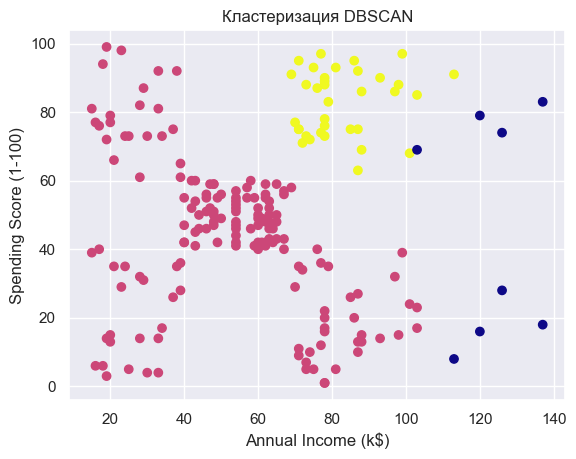

In [170]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=clusters_dbscan, cmap='plasma')
plt.title('Кластеризация DBSCAN')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [171]:
param_grid = {
    'eps': np.arange(0.1, 1.0, 0.1),
    'min_samples': range(1, 10)
}

silhouette_scorer = make_scorer(silhouette_score)


In [172]:
grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, scoring=silhouette_scorer, cv=5)
grid_search.fit(X_scaled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

c:\Users\Redmi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Redmi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\Redmi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Redmi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^

In [173]:
print(f"Лучшие параметры: {best_params}")
print(f"Лучший силуэтный коэффициент: {best_score:.2f}")

Лучшие параметры: {'eps': 0.1, 'min_samples': 1}
Лучший силуэтный коэффициент: nan


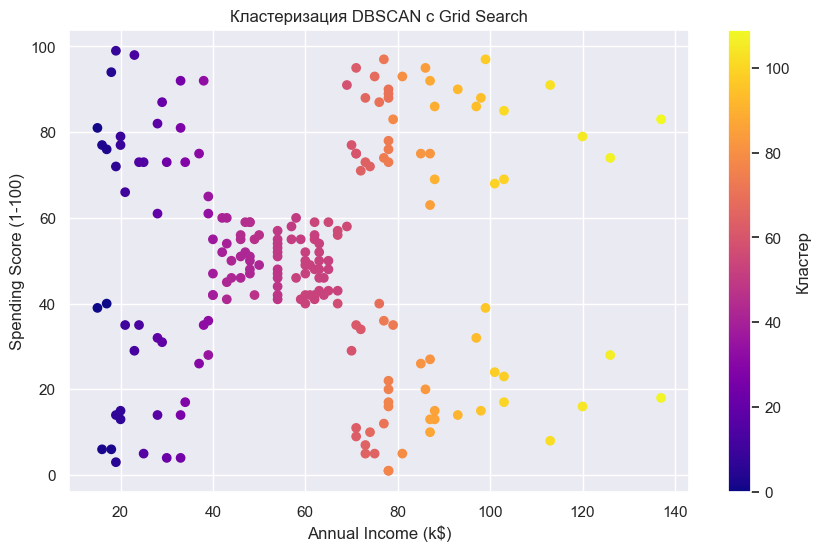

In [174]:
best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
clusters_dbscan = best_dbscan.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=clusters_dbscan, cmap='plasma', marker='o')
plt.title('Кластеризация DBSCAN с Grid Search')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Кластер')
plt.show()

# Построим графики

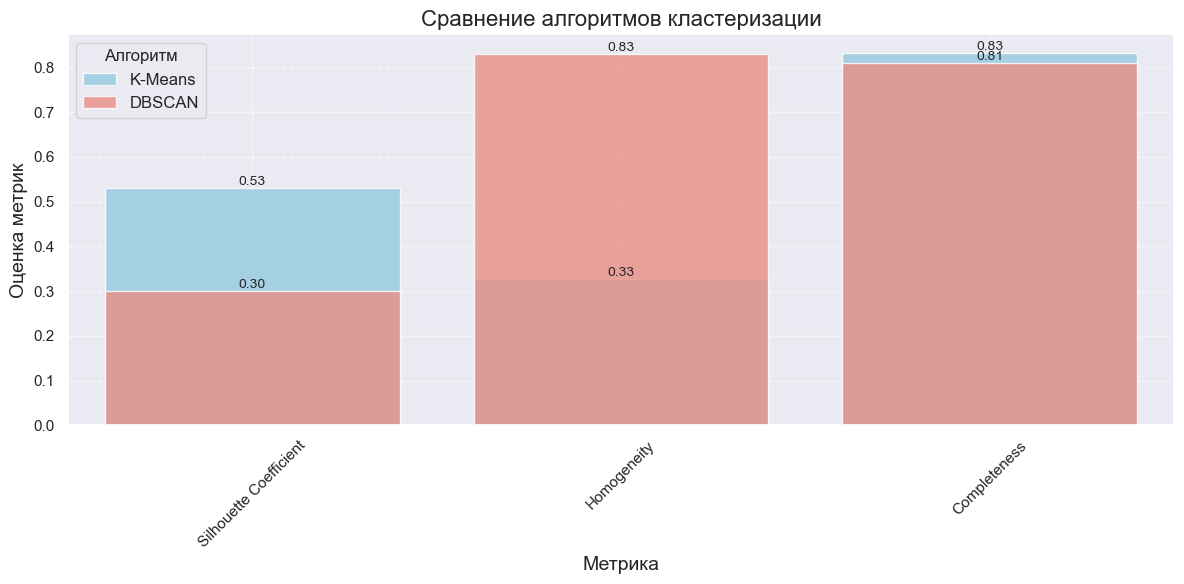

In [175]:
plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(data=results, x='Metric', y='K-Means', color='skyblue', label='K-Means', alpha=0.8)
sns.barplot(data=results, x='Metric', y='DBSCAN', color='salmon', label='DBSCAN', alpha=0.8)

plt.title('Сравнение алгоритмов кластеризации', fontsize=16)
plt.ylabel('Оценка метрик', fontsize=14)
plt.xlabel('Метрика', fontsize=14)
plt.xticks(rotation=45)  
plt.legend(title='Алгоритм', fontsize=12)
plt.axhline(0, color='gray', lw=0.8)

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()


## Анализ результатов кластеризации

В данном разделе представлены метрики, оценившие качество кластеризации, выполненной с помощью алгоритмов K-Means и DBSCAN.

### 1. Silhouette Coefficient
**K-Means:** 0.53  
**DBSCAN:** 0.30  

**Интерпретация:** 
- Silhouette Coefficient измеряет, насколько хорошо объекты расположены в своих кластерах по сравнению с соседними кластерами. Значение от 0.5 до 1.0 указывает на то, что объекты хорошо сгруппированы. 
- K-Means демонстрирует значительно более высокое значение (0.53), что свидетельствует о том, что объекты в кластерах более компактны и лучше отделены от объектов других кластеров по сравнению с DBSCAN (0.30). Это может означать, что K-Means более эффективно справляется с данной задачей кластеризации.

### 2. Homogeneity
**K-Means:** 0.33  
**DBSCAN:** 0.83  

**Интерпретация:** 
- Homogeneity оценивает, насколько все объекты в одном кластере принадлежат к одной и той же категории. Значение 1.0 означает, что все объекты в кластере принадлежат к одному классу.
- DBSCAN имеет высокое значение (0.83), что указывает на то, что большинство объектов в кластерах относятся к одной и той же категории. В то же время, K-Means показывает более низкое значение (0.33), что говорит о том, что в его кластерах больше смешивания классов. Это может быть связано с тем, что K-Means склонен к образованию более сфокусированных, но менее однородных кластеров.

### 3. Completeness
**K-Means:** 0.83  
**DBSCAN:** 0.81  

**Интерпретация:** 
- Completeness измеряет, насколько объекты, принадлежащие одному классу, находятся в одном и том же кластере. Значение 1.0 означает, что все объекты одного класса находятся в одном кластере.
- Оба алгоритма показывают высокие значения (K-Means - 0.83, DBSCAN - 0.81), что свидетельствует о хорошей способности кластеров содержать объекты одного класса. Несмотря на небольшую разницу, можно сказать, что оба алгоритма демонстрируют аналогичные результаты по этой метрике.

### Общие выводы
- **K-Means** показал лучшие результаты по Silhouette Coefficient, что свидетельствует о хорошей компактности кластеров, однако его Homogeneity остается низким.
- **DBSCAN** продемонстрировал значительно более высокие показатели Homogeneity, что указывает на лучшую однородность классов в кластерах, несмотря на более низкое значение Silhouette Coefficient.
- Оба алгоритма показывают схожие результаты по метрике Completeness.

Эти результаты могут помочь в дальнейшем выборе подходящего алгоритма для решения задачи кластеризации в зависимости от акцентов на компактность и однородность кластеров.

Вариант улучшения: попробовать кластеризовать колонки Age и Annual Income (k$), а после уже кластеризовать их с Spending Score (1-100)
